In [4]:
%matplotlib inline

# Lecture on Numerical Simulation Methods

## Euler Method for ordinary differential equations

The simplest numerical method for soluving a differential equation is called the Euler Method, which is a discretization of the differentiation.
For the definition of the differentiation
\begin{equation}
 \frac{dx}{dt} = \lim_{h  \rightarrow 0} \frac{x(t + h ) - x(t)}{h } ,
\end{equation}
we take a finite $h$.
For a differential equation
$$
  \frac{dx}{dt} = f(x),
$$
we calculate numerically $x(t+h)$ from $x(t)$ by
\begin{equation}
 x(t + h ) = x(t) + h  f(x(t))
\end{equation}

### Euler Method for a harmonic oscillator

Let's try to calculate a harmonic oscillator equation
$$
\begin{eqnarray}
   \frac{dx}{dt} & = & v \\
   \frac{dv}{dt} & = & - kx
\end{eqnarray}
$$
by using the Euler method.

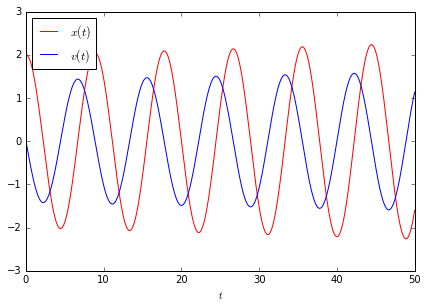

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def harmonic_eq(x,dt):
    k = 0.5
    return x[1], - k*x[0]

def euler_2var(x,func,dt):
    y = func(x,t)
    return x[0] + dt*y[0], x[1]+ dt*y[1]

def calc_plot2var(method, equation):
    global t
    dt = 0.01
    n_steps = 5000
    t = np.arange(0, n_steps*dt, dt)
    x = np.zeros((n_steps,2))
    x[0][0] = 2.0    # initial position
    for i in range(n_steps-1):
        x[i+1] = method(x[i],harmonic_eq, dt)
    
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # lower, bottom, width, height (range 0 to 1)
    axes.plot(t, x[:,0], 'r', label="$x(t)$")
    axes.plot(t, x[:,1], 'b', label="$v(t)$")
    axes.set_xlabel("$t$")
    
    plt.legend(loc='upper left')
    plt.show()

if __name__ == "__main__" :
    calc_plot2var(euler_2var, harmonic_eq)
    

    

As you can see in the figure, the amplitude grows, whereas we can easily show the solution is given by a trigonometric function. Thus, the numerical error accumulates as time proceeds in many cases, though if the error changes its sign step by step, the sum of error cause little problem.

### A simple improved method: Heun Method

A second-order discretization of differential equations are called Heun method, which is defined by
\begin{equation}
   x(t+h ) = x(t) + \frac{h }{2} \left[ f(x(t)) +
					      f(x^p(t+h ))\right]
\end{equation}
where
\begin{equation}
   x^p(t+h ) = x(t) + h f(x(t))
\end{equation}

The below is an example where the Heun method is explicitly defined. As shown in the figure, the solution looks like a periodic motion as expected.

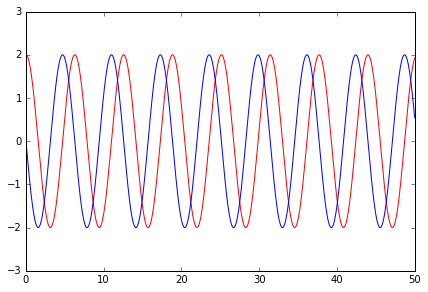

In [5]:
def heun_2var(x, func,dt) :
    temp1 = np.zeros(2)
    temp2 = np.zeros(2)
    temp1 = func(x,dt)
    temp2 = func([x[0]+temp1[0]*dt, x[1]+temp1[1]*dt],dt)
    val1 = x[0] + dt/2.0 * (temp1[0] + temp2[0])
    val2 = x[1] + dt/2.0 * (temp1[1] + temp2[1])
    return val1, val2

if __name__ == "__main__" :
    calc_plot2var(heun_2var, harmonic_eq)
                 

### Using "scipy",  scientific library of python



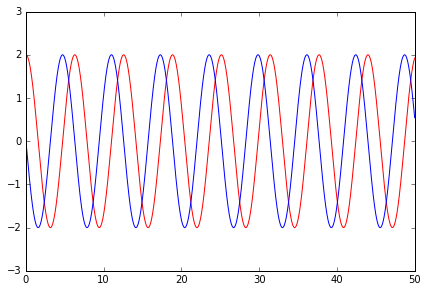

In [75]:
from scipy.integrate import odeint
def func(x,t):
    k = 1.0
    return x[1], - k*x[0]

y = odeint(func,(x[0][0], x[0,1]),t)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # lower, bottom, width, height (range 0 to 1)
axes.plot(t, y[:,0], 'r')
axes.plot(t, y[:,1], 'b')
plt.show()


## Nonlinear differential equations with unstable trajectory

Some dynamical equations with variables whose number is  larger than 3 are known to show a complex trajectory. Those are called "Chaos". A most welknown equation is Lorenz equation defined by 
$$
\begin{eqnarray}
\frac{dx}{dt} &= \sigma (y-x) \\
\frac{dy}{dt} &= -xz + rx - y\\
\frac{dz}{dt} &=xy -bz
\end{eqnarray}
$$
where $(x(t), y(t), z(t))$ are time-dependent variables and $\sigma,\ r,\ b$ are constants.
This equation was derived by Lorenz in the early 60s. His goal was to describe the motion of atomospheric convection on the earth surface and reduced the degrees of freedom of the fluid equation to 3 variables.

The trajectory falls into a complex plane called "strange attractor" of whch shape is like a butterfly . The plane is very thin (thickness is zero) but the trajectory never cross a point because the equation is deterministic and it is not periodic. Analytical study shows this attractor has the fractal dimension 2.06 (not integer, 2).

### Exercise 1
Soluve numerically the above equation and show the trajectory on a graphic plane and plot the values of 3 variables versus time.

<img src="http://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/images/lorenz_matplotlib.png"/>


If you have time, try to make a code displaying animation as the following.

In [1]:
import io
import base64
from IPython.display import HTML

video = io.open('images/lorenz_xyz_t.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))


In [2]:
import io
import base64
from IPython.display import HTML

video = io.open('images/lorenz3d.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))


## Poincare map (Exercise 2)

To characterize the complex behavior of unstable tragectries such as Lorenz map, Poincare map is useful.
Poincare map is to make a discrete sequence of a variable picked up from a trajectory by a definite rule. Here, let's try to find peak values of $z$ and plot $n$th peak value $z_n$ versus $(n+1)$th peak $z_{n+1}$. You will get a plot as below.


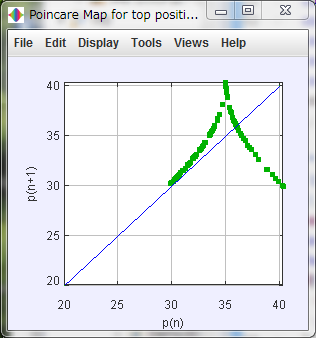

The above figure is similar with a discrete map such as "Logistic Map" which shows a chaotic behavior accompanied with period-doubling bifurcation phenomena.

## the Logistic Map which causes a complex behavior including bifurcation and chaos

Logistic map is defined by
$$ x_{n+1} = a(1-x_n^2) $$

Let's plot $x_{n+1}$ versus $x_{n}$, which yields a figure as below.


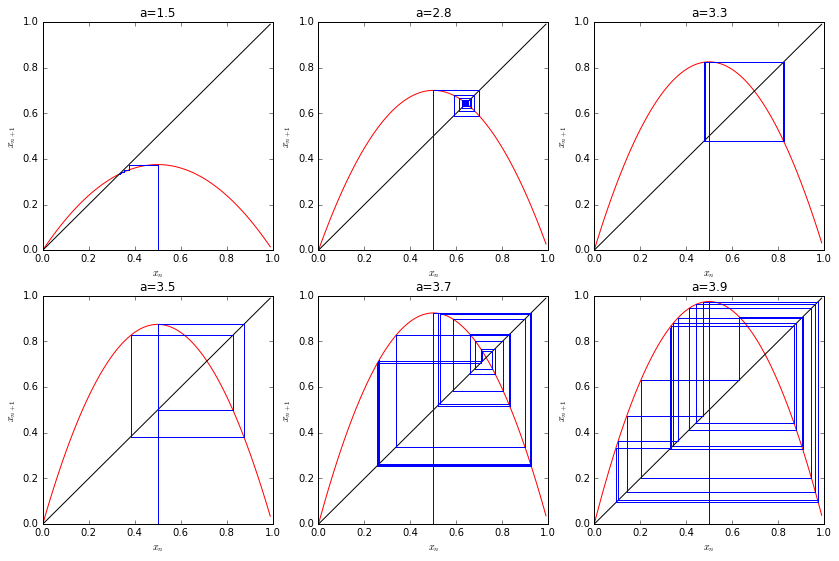

In [10]:
%matplotlib inline
# Logistic map

import numpy as np
import matplotlib.pyplot as plt
def logisticFunc(xin,a):
    return a*xin*(1-xin)

a_vals = [1.5, 2.8, 3.3, 3.5, 3.7, 3.9]

x = np.arange(0,1.0,0.01)
fig = plt.figure(figsize=(14,9))
for i in range(6):
    axes = fig.add_subplot(2,3,i+1)
    a = a_vals[i]    # The parameter of the logistic map. Try to change the value between 0 < a < 4
    xn = 0.5   # initial value of the variable
    
    axes.plot(x, a*x*(1-x), 'r')
    axes.plot(x, x, 'k')
    axes.set_xlabel("$x_n$")
    axes.set_ylabel("$x_{n+1}$")
    axes.set_title("a=" + str(a))
    
    xnext = logisticFunc(xn,a) 
    axes.plot([xn,xn],[0,xnext])
    for i in range(20):
        axes.plot([xn,xnext],[xnext,xnext],"b")
        xn = xnext
        xnext = logisticFunc(xn,a)
        axes.plot([xn,xn], [xn,xnext],"b")

plt.show()

As seen in the above figure, the tragectory asymptotically approaches a fixed point for $a=1.5$ and $a=2.8$, a 2-period fixed point for $a=3.3$, and a 4-period fixed point for $a=3.5$ whereas the case for $a=3.9$ looks a non-periodic complex trajectory.

The next figure shows the values of $x_n$ plotted on a vertical line for each $a$ after a transient regime. You can see the "period-doubling bifurcation" of the fixed point and chaotic regions between them. Not that the sequence of period.

If you execute the below code, you can plot this figure. If you have time, try to make a code that can yields a plot for arbitrary range of $x$ and $a$.
The package "Tkinter" is used to plot the figure and utilize the control panel. If you wish to run in the "Wakari", you need to change "Anaconda" environment to be able to use this package (but I don't know whether it is possible.) If you are interested in running it in Wakari, please try it or you try to realize the same calculation by using matplotlib.


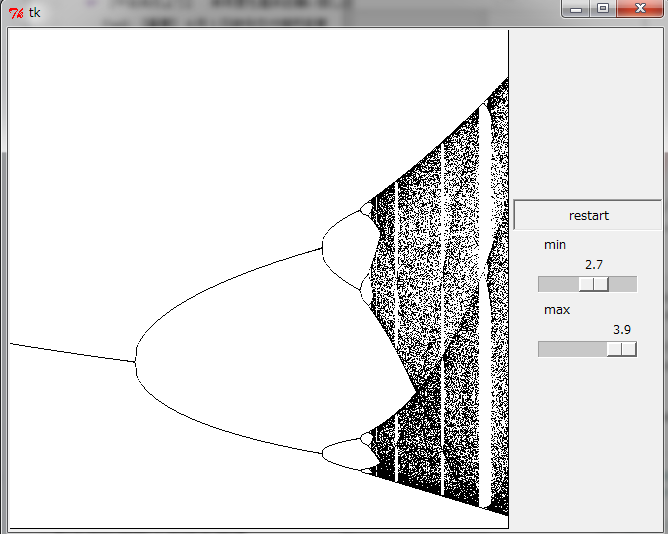

In [7]:
#  Derived from
#   chaos-3.py
#
#  Build Feigenbaum Logistic map. Input start and end K
#
#  python chaos-3.py 3.4 3.9  
#
from Tkinter import * #Tk, Canvas, Frame, Button, Scale

canWidth=500
canHeight=500

def restartApp (ev) :
    global k1,k2, set_k1, set_k2
    canvas.create_rectangle(0, 0, canWidth, canHeight, fill = 'white')
    k1 = set_k1.get()
    k2 = set_k2.get()
    startApp()

def startApp () :
    global win, canvas, k1, k2
#   import sys
   
    x = .8                     # initial value of the map, which is somewhat arbitrary
    transient_range = range(50)
    vrng = range(300)          # We'll do 200 horz steps
    for t in range(canWidth) :
        win.update()
        k = k1 + (k2-k1)*t/canWidth
        # print "K = %.04f" % k
        for i in transient_range :
            x = x* (1-x) * k               # transient region is not drawn
        
        for i in vrng :
            p = x*canHeight
            canvas.create_line(t,p,t,p+1)  # just makes a pixel dot
            x = x * (1-x) * k              # next x value
            if x <0 or x >= 1.0 :
                print "overflow at k", k
                return
    
def setupWindow () :
    global win, canvas, set_k1, set_k2, k1, k2
    k1  = 3.5 # starting value of K
    k2  = 3.9   # ending   value of K
    
    win = Tk()
    
    # controler
    controlBox = Frame(win)
    StartBtn = Button(controlBox,text=u"restart", width=20)
    StartBtn.bind("<Button-1>", restartApp)

    # sliders for parameter setting
    set_k1 = Scale(controlBox, from_=1.0, to=3.9, resolution=0.1, orient=HORIZONTAL, labe="min")
    set_k2 = Scale(controlBox, from_=1.2, to=3.9, resolution=0.1, orient=HORIZONTAL, labe="max")
    set_k1.set(k1) # initial value
    set_k2.set(k2)
    canvas = Canvas(win, height=canHeight, width=canWidth)
    
    # Drawing frame
    f = Frame (win)    
    canvas.pack(side="left")
    StartBtn.pack()
    set_k1.pack()
    set_k2.pack()
    controlBox.pack(side="right")
    f.pack()

if __name__ == "__main__" : 
    setupWindow()       # Create Canvas with Frame
    startApp()          # Start up the display  
    win.mainloop()      # Just wait for user to close graph

## GUI in notebook

By using ipython interactive widget "IPython.html.widgets.interact", we can construct gui in the notebook such as sliders and button.
A sample shows below. If you have time, please try to make gui controking the parameter $a$ of the logistic map.

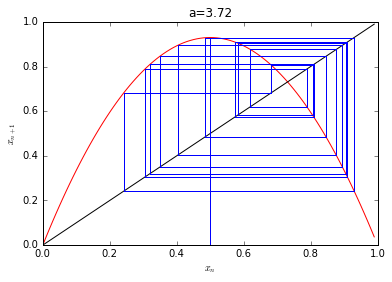

In [3]:
%matplotlib inline
from __future__ import print_function
from IPython.html.widgets import interact, interactive, fixed # we use only "interact" in this script
from IPython.html import widgets
import numpy as np
import matplotlib.pyplot as plt

def logisticFunc(xin,a):
    return a*xin*(1-xin)

def plotLogisticMap(a=3.2, iteration=20):

    xn = 0.5   # initial value of the variable
    
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    # draw y=x and f(x)
    x = np.arange(0,1.0,0.01)
    axes.plot(x, a*x*(1-x), 'r')
    axes.plot(x, x, 'k')
    
    axes.set_xlabel("$x_n$")
    axes.set_ylabel("$x_{n+1}$")
    axes.set_title("a=" + str(a))
    
    xnext = logisticFunc(xn,a) 
    axes.plot([xn,xn],[0,xnext])
    for i in range(iteration):
        axes.plot([xn,xnext],[xnext,xnext],"b")
        xn = xnext
        xnext = logisticFunc(xn,a)
        axes.plot([xn,xn], [xn,xnext],"b")

interact(plotLogisticMap, a=(0.0,4.0,0.02), iteration=(10,100,5))
